### Converting audio to spectrogram images to use with CNN ###

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

import numpy as np
from IPython.display import Audio

In [2]:
# Read in the audio
y, sr = librosa.load('Jazzy_Piano_AI_Genrated.mp3')

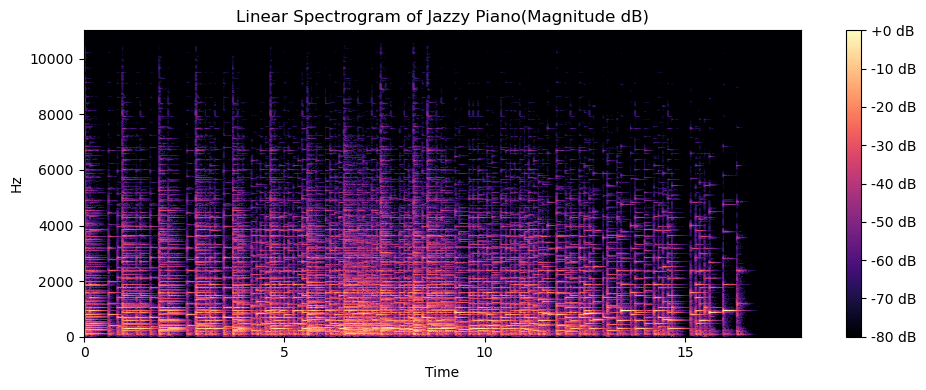

In [3]:
# Extracting a normal Spectrogram

# Compute the STFT
D = librosa.stft(y)

# Get the magnitude spectrogram
S_magnitude = np.abs(D)

# Optional: Convert to decibels
S_db = librosa.power_to_db(S_magnitude**2, ref=np.max) # power=2 by default for power spectrogram

# Display the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='linear') # Use 'linear' for a bare spectrogram
plt.colorbar(format='%+2.0f dB')
plt.title('Linear Spectrogram of Jazzy Piano(Magnitude dB)')
plt.tight_layout()
plt.show()

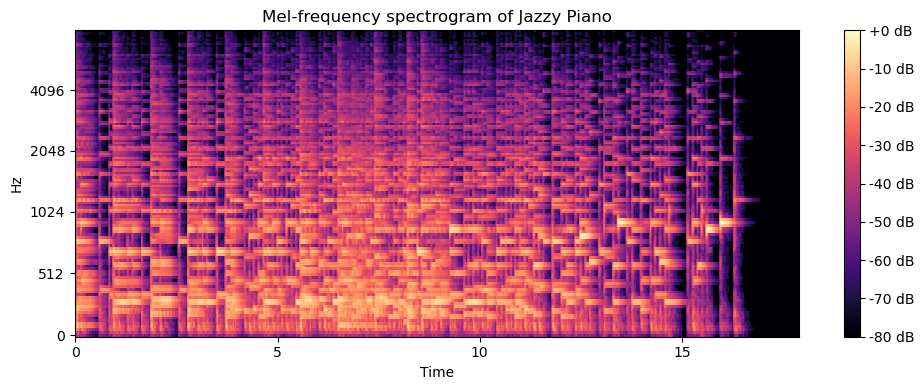

In [4]:
# Extract Mel Spectrogram

spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

# Conver energy to decibels (Human perception)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# n_mels=128: This sets the number of Mel frequency bins. 
# A higher value means the output will have finer frequency resolution. 
# 128 is a common choice, particularly for music and speech processing.

# fmax=8000: This specifies the highest frequency, in Hz, to be considered for the Mel filters.
# Limiting the frequency range is useful for focusing on specific audible frequency ranges, 
# such as those most relevant for speech

plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram_db, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram of Jazzy Piano')
plt.tight_layout()
plt.show()
